0       0.000000
1       0.000000
2       0.000000
3       0.150000
4       0.000000
          ...   
2614    0.316667
2615    0.237500
2616    0.000000
2617   -0.300000
2618    0.362500
Name: sentiment, Length: 2619, dtype: float64
0      0.000000
1     -1.000000
2      0.100000
3      0.000000
4      0.000000
         ...   
344    0.225000
345    0.000000
346    0.200000
347   -0.241667
348    0.000000
Name: sentiment, Length: 349, dtype: float64
[1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 

(array([2.098e+03, 4.450e+02, 4.700e+01, 1.500e+01, 6.000e+00, 1.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([  1. ,  21.5,  42. ,  62.5,  83. , 103.5, 124. , 144.5, 165. ,
        185.5, 206. ]),
 <BarContainer object of 10 artists>)

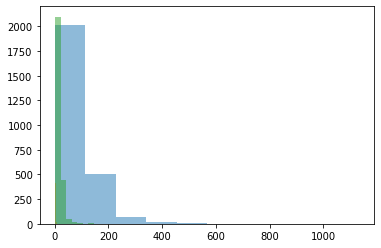

In [56]:
#import libraries
import json
import pandas
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt


def clean_text(text):
    # Parse the text using the English language model
    # The returned object is an iterator over all tokens
    parsed_text = nlp(text)
    #print(parsed_text)
    # Initialize a list which will later hold the tokens of the text
    tokenized_clean_text = []
    
    # For each token in the text...
    for token in parsed_text:
        # If the token is _not_ one of the following, append it to
        # the final list of tokens; continue otherwise
        if (not token.is_punct and  # Punctuation
                not token.is_space and  # Whitespace of any kind
                not token.like_url and # Anything that looks like an url
                not token.is_stop):  # Stopwords
            tokenized_clean_text.append(token.text.lower())
    
    # Return the cleaned version for this text
    return ' '.join(tokenized_clean_text)

special_verbs_list = ["because","should","would","that","must","could","believe","wish","belief"]
def check_spezial_words(text):
    #return_data = False
    if any(x in text for x in special_verbs_list):
        #print("\n----------------" + text + " True\n")
        return 1
    #print("\n----------------" + text + " False\n")
    return 0

#get training set
with open("train-data-prepared.json", "r") as f:
    train_data = json.load(f)

#get validation set
with open("val-data-prepared.json", "r") as f:
    val_data = json.load(f)

#print(train_data)
#get keys of training set
train_keys = list(train_data[0].keys())
#initialize pandas dataframe
train_df = pandas.DataFrame(columns=train_keys,data=train_data)

#get keys of training set
val_keys = list(val_data[0].keys())
#initialize pandas dataframe
val_df = pandas.DataFrame(columns=val_keys,data=val_data)

#print(train_keys)
#print(train_df)
#load english language
nlp = spacy.load("en_core_web_sm")
#clean the training set
train_df["cleaned_text"] = train_df["text"].apply(clean_text)
val_df["cleaned_text"] = val_df["text"].apply(clean_text)
# print(train_df)

#Feature Extraction
#Number of characters
train_df["char_count"] = train_df["text"].apply(len)
val_df["char_count"] = val_df["text"].apply(len)
#print(charCount)
train_df["contains_verbs"] = train_df["text"].apply(check_spezial_words)
val_df["contains_verbs"] = val_df["text"].apply(check_spezial_words)
#Count Vectorization
vectorizer = CountVectorizer()
X_train_vectorised = vectorizer.fit_transform(train_df["cleaned_text"])

vectorizer3 = CountVectorizer()
X_test_vectorised = vectorizer.fit_transform(val_df["cleaned_text"])

#print("X")
#print(vectorizer.get_feature_names())
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X2 = vectorizer2.fit_transform(train_df["text"])
# print("X2")
# print(vectorizer2.get_feature_names())

#sentiment Analysis
train_df["sentiment"] = train_df["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
val_df["sentiment"] = val_df["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
#print(train_df["sentiment"])


train_df["noun_count"] = train_df["text"].apply(lambda x: 
                   len(TextBlob(x).noun_phrases))
val_df["noun_count"] = val_df["text"].apply(lambda x: 
                   len(TextBlob(x).noun_phrases))

train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
val_df['word_count'] = val_df['text'].apply(lambda x: len(x.split()))

train_df['char_count'] = train_df['text'].apply(len)
val_df['char_count'] = val_df['text'].apply(len)

train_df['word_density'] = train_df['char_count'] / (train_df['word_count']+1)
val_df['word_density'] = val_df['char_count'] / (val_df['word_count']+1)

#Classification
#X_train = np.array([train_df["contains_verbs"],train_df["noun_count"],train_df["word_count"],
#                    train_df["sentiment"],train_df["char_count"],train_df["word_density"]])
X_train = np.array([train_df["sentiment"],train_df["contains_verbs"]])
X_train = np.transpose(X_train)
Y_train = train_df["label"]
Y_train = Y_train.values.reshape(len(Y_train),)

clf = SVC()
clf.fit(X_train,Y_train)

#X_test = np.array([val_df["contains_verbs"],val_df["noun_count"],val_df["word_count"],
#                   val_df["sentiment"],val_df["char_count"],val_df["word_density"]])
X_test = np.array([val_df["sentiment"],val_df["contains_verbs"]])
X_test = np.transpose(X_test)
Y_test = val_df["label"]
Y_test = Y_test.values.reshape(len(Y_test),)


Y_pred = clf.predict(X_test)

print(train_df["sentiment"])
print(val_df["sentiment"])

print(Y_test)
print(Y_pred)

# Evaluate the predictions and print the result
print(f1_score(Y_test, Y_pred))

plt.hist(train_df["char_count"], alpha=0.5, label='x')
plt.hist(train_df["noun_count"], alpha=0.5, label='y')
plt.hist(train_df["word_count"], alpha=0.5, label='z')